In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv")

In [6]:
display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Manipulation**

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes.head(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
data = diabetes.drop(['Pregnancies', 'Outcome'], axis = 1) 

In [11]:
# Replacing 0 with nan values
data.replace(0, np.nan, inplace = True)

In [12]:
data.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Age                           0
DiabetesPedigreeFunction      0
dtype: int64

**Handling Missing Values**

In [13]:
data['Insulin'].unique() 

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [14]:
data['SkinThickness'].unique() 

array([35., 29., nan, 23., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

In [15]:
# If Data is continious replace by Mean, if data is discrete - replace by Median 
data['Insulin'].mean() 

155.5482233502538

In [16]:
data['Insulin'].replace(np.nan, np.round(data['Insulin'].mean()), inplace = True) 

### Imputer

In [17]:
from sklearn.impute import SimpleImputer
# strategy = "median" & "mean"
impute = SimpleImputer(strategy = 'median')
data_array = impute.fit_transform(data)

In [18]:
data_array 

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
diabetes_df = pd.DataFrame(data_array, columns = data.columns)
diabetes_df 

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0


In [20]:
diabetes_df['Pregnancies'] = diabetes.Pregnancies
diabetes_df['Outcome'] = diabetes.Outcome 

In [21]:
diabetes_df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

### Data Augmentation
* Regenerating new samples using bootstrapping for biased dataset

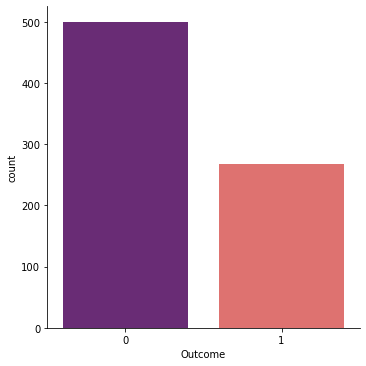

In [22]:
sns.catplot(x = 'Outcome', kind = "count", data = diabetes_df, palette="magma") 

In [23]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
from sklearn.utils import resample
df_0 = diabetes_df[diabetes_df['Outcome'] == 0]
df_1 = diabetes_df[diabetes_df['Outcome'] == 1]

In [25]:
# apply resample
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123)

In [26]:
diabetes_df1 = pd.concat([df_0, df_1_upsample])

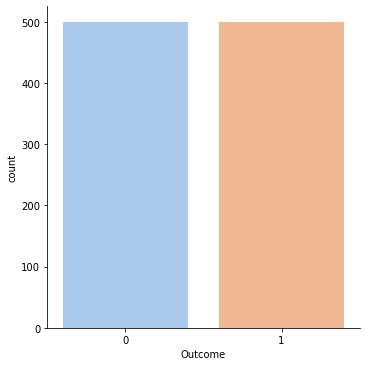

In [32]:
sns.catplot(x = 'Outcome', kind = "count", data = diabetes_df1, palette="pastel") 

**Correlation**

<AxesSubplot:>

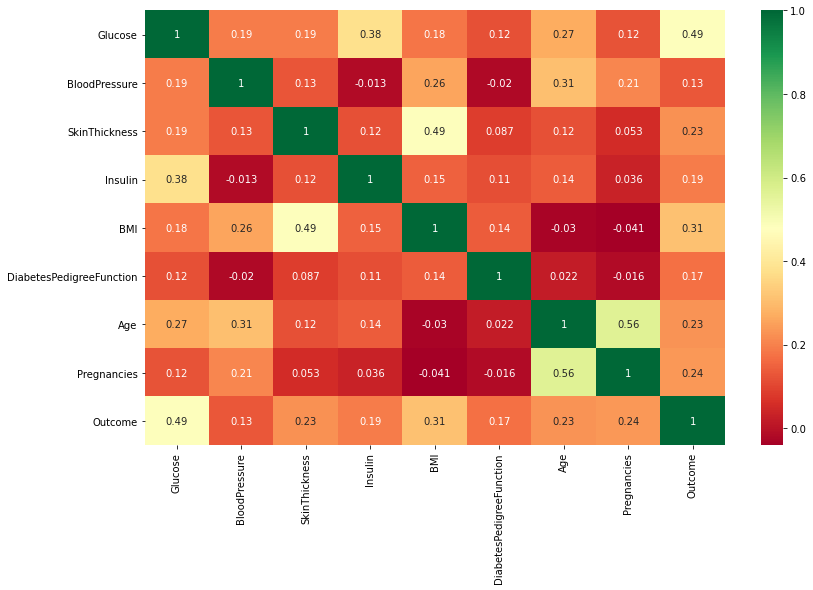

In [33]:
plt.figure(figsize = (13,8))
sns.heatmap(diabetes_df1.corr(), annot = True, cmap = 'RdYlGn')

**Cross Validation**

In [34]:
X = diabetes_df1.drop(['Outcome'], axis = 1)
Y = diabetes_df1['Outcome']

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#### ANN Classification

In [37]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [29]:
def build_model():
    model = Sequential()

    # Input Layer 
    model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))

    # Hidden Layer - I
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(0.2))

    # Hidden Layer - II
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(0.2))

    # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))

    # Learning rate for Adam Optimizers
    optimizers = Adam(learning_rate = 0.001)

    # Model compiler
    model.compile(loss = "binary_crossentropy", optimizer = optimizers, metrics = ['accuracy'])

    return model

In [30]:
model = build_model() 

In [31]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [32]:
history = model.fit(X_train, Y_train, epochs = 500, batch_size= 25, validation_split = 0.2)

Epoch 1/500
26/26 [==============================] - 17s 31ms/step - loss: 5.5734 - accuracy: 0.5283 - val_loss: 1.0545 - val_accuracy: 0.6250
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 1.9211 - accuracy: 0.5729 - val_loss: 0.8534 - val_accuracy: 0.6375
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8771 - accuracy: 0.5146 - val_loss: 0.6911 - val_accuracy: 0.6250
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1992 - accuracy: 0.5760 - val_loss: 0.6255 - val_accuracy: 0.6687
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0510 - accuracy: 0.5725 - val_loss: 0.6199 - val_accuracy: 0.6562
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0369 - accuracy: 0.5452 - val_loss: 0.6927 - val_accuracy: 0.6375
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0203 - accuracy: 0.5694 - val_loss: 0.6575 - val_accuracy: 0.6438
Epoch 8/500

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,4.209885,0.542188,1.054538,0.62500
1,2.039120,0.540625,0.853411,0.63750
2,1.693835,0.529688,0.691090,0.62500
3,1.203649,0.562500,0.625534,0.66875
4,1.190620,0.551562,0.619859,0.65625
...,...,...,...,...
495,0.249565,0.887500,0.497133,0.83750
496,0.235849,0.898438,0.528740,0.78750
497,0.258441,0.884375,0.527497,0.76875
498,0.250267,0.892187,0.542890,0.80000


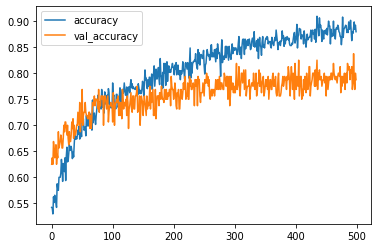

In [34]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot() 

In [35]:
model.evaluate(X_test, Y_test) 

7/7 [==============================] - 0s 2ms/step - loss: 0.8136 - accuracy: 0.7750


[0.8135553002357483, 0.7749999761581421]

**Classification Metrics**

In [38]:
predict = model.predict(X_test)
yhat = np.round(predict)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, yhat) 

array([[77, 21],
       [24, 78]])

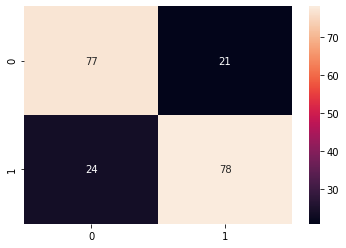

In [42]:
sns.heatmap(confusion_matrix(Y_test, yhat), annot = True)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        98
           1       0.79      0.76      0.78       102

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200

